# Relatório de Analises VIII

## Identificando e Removendo os Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [22]:
dados = pd.read_csv('Aluguel_Residencial.csv')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0


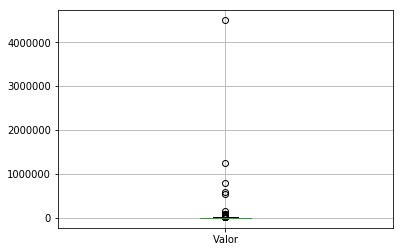

In [5]:
dados.boxplot(['Valor'])

In [7]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0


In [20]:
valor = dados['Valor']

In [21]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limit_inferior = Q1 -1.5*IIQ
limit_superior = Q3 + 1.5*IIQ
print (Q1,Q3, IIQ)

1600.0 5500.0 3900.0


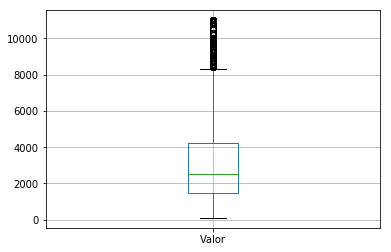

In [12]:
selecao = (valor >= limit_inferior) & (valor <= limit_superior)
dados_new = dados[selecao]
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBA3D85470>]],
      dtype=object)

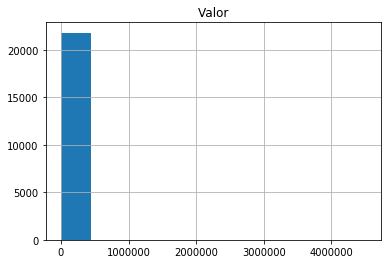

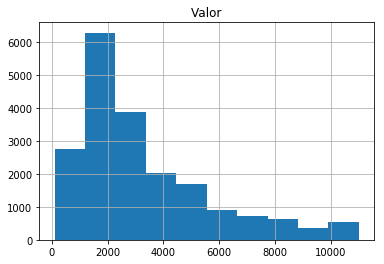

In [24]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

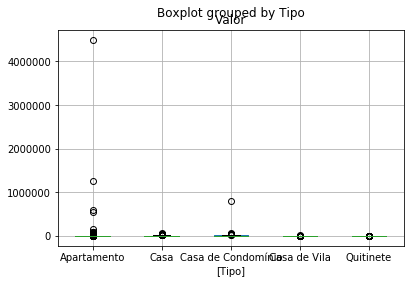

In [25]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [27]:
grupo_tipo = dados.groupby('Tipo')
grupo_tipo

In [28]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limit_inferior = Q1 -1.5*IIQ
limit_superior = Q3 + 1.5*IIQ
print (Q1,Q3, IIQ)

0.25                Quartos  Vagas  Suites    Area   Valor  Condominio  IPTU
Tipo                                                                        
Apartamento             2.0    1.0     0.0   67.00  1700.0      600.00   0.0
Casa                    2.0    0.0     0.0   70.00  1100.0        0.00   0.0
Casa de Condomínio      3.0    2.0     1.0  205.25  4000.0      490.00   0.0
Casa de Vila            1.0    0.0     0.0   45.00   750.0        0.00   0.0
Quitinete               1.0    0.0     0.0   24.00   900.0      325.75   0.0 0.75                Quartos  Vagas  Suites   Area    Valor  Condominio  \
Tipo                                                                     
Apartamento             3.0    2.0     1.0  145.0   5000.0      1622.0   
Casa                    4.0    3.0     2.0  357.0   9800.0         0.0   
Casa de Condomínio      5.0    4.0     4.0  650.0  15250.0      1632.5   
Casa de Vila            2.0    1.0     0.0   81.0   1800.0        50.0   
Quitinete        

In [32]:
limit_superior['Casa']

KeyError: 'Casa'